# Census Income Project

## Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Intent:

The prediction task is to determine whether a person makes over $50K a year.


# Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.




In [185]:
# Importing main required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight') # Good looking plots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets




# Not to display warnings.

import warnings
warnings.filterwarnings('ignore')

In [186]:
# Read the given data set
data=pd.read_csv('/Users/rakeshchandramaity/Desktop/ml/cencus_income.csv')

In [187]:
## Keeping our raw data safe in 'data' data frame. As we are now going to work with 'df'data frame.

df=data

In [188]:
# Head Checking
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [189]:
# Tail Checking
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [190]:
# Understanding the row & column numbers
df.shape

(32560, 15)

In [191]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [192]:
# So now checking all the data are in numeric form or Not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [193]:
# checking the columns of the data

df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [194]:
#Checking for missing/null values.


df.isnull().sum()  

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [195]:
# checking the distribution of the data sets
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [196]:
# Check for null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

In [197]:
# Check for missing value in the data set in dataset
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

Age                0.0 %
Workclass         5.64 %
Fnlwgt             0.0 %
Education          0.0 %
Education_num      0.0 %
Marital_status     0.0 %
Occupation        5.66 %
Relationship       0.0 %
Race               0.0 %
Sex                0.0 %
Capital_gain       0.0 %
Capital_loss       0.0 %
Hours_per_week     0.0 %
Native_country    1.79 %
Income             0.0 %
dtype: object

In [198]:
# Checking the counts of label categories
income = df['Income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: Income, dtype: object

# Exploratory Data Analysis

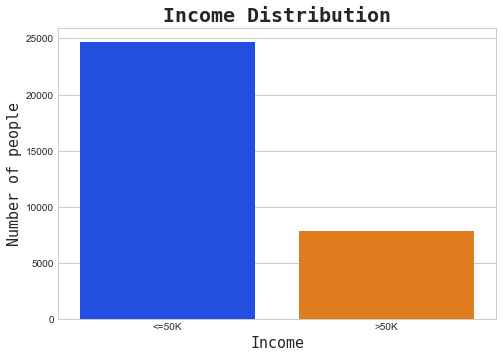

In [199]:
# Creating a barplot for 'Income'
income = df['Income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright', color = 'blue')
plt.title('Income Distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

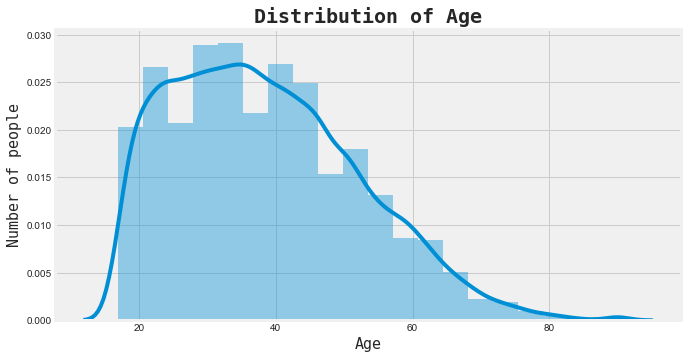

In [200]:
# Creating a distribution plot for 'Age'
age = df['Age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df['Age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

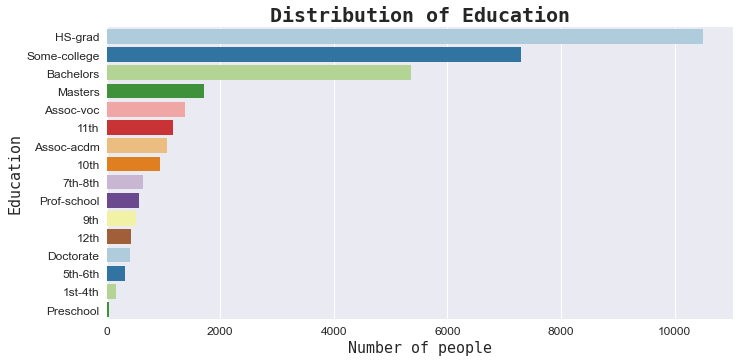

In [201]:
# Creating a barplot for 'Education'
edu = df['Education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

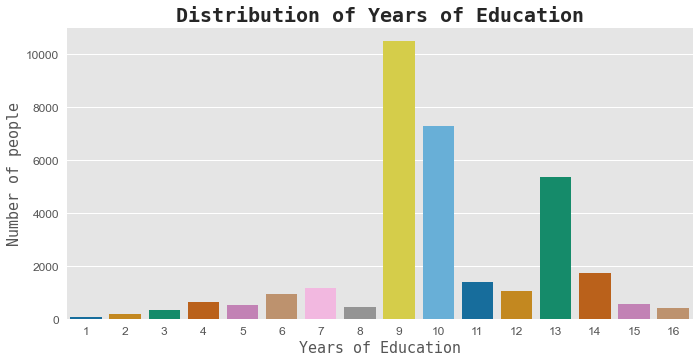

In [202]:
# Creating a barplot for 'Years of Education'
edu_num = df['Education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

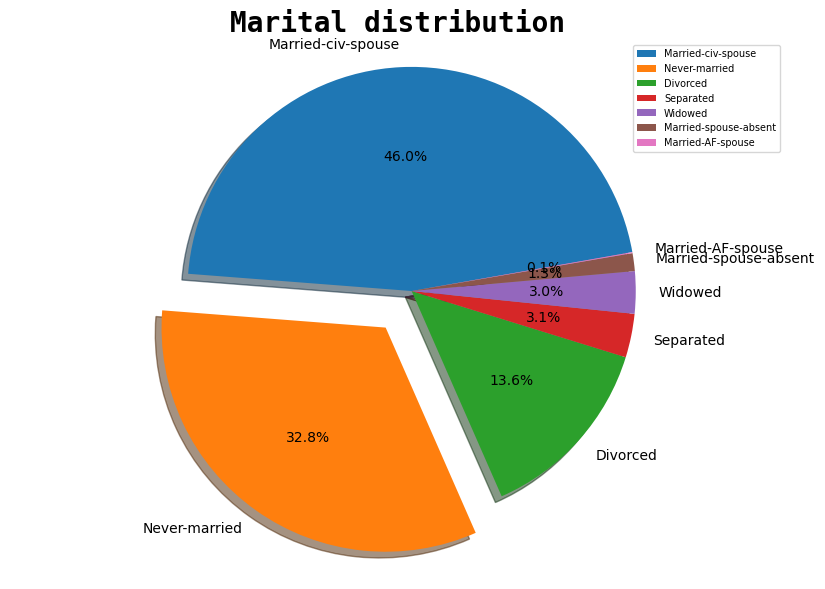

In [203]:
# Creating a pie chart for 'Marital status'
marital = df['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

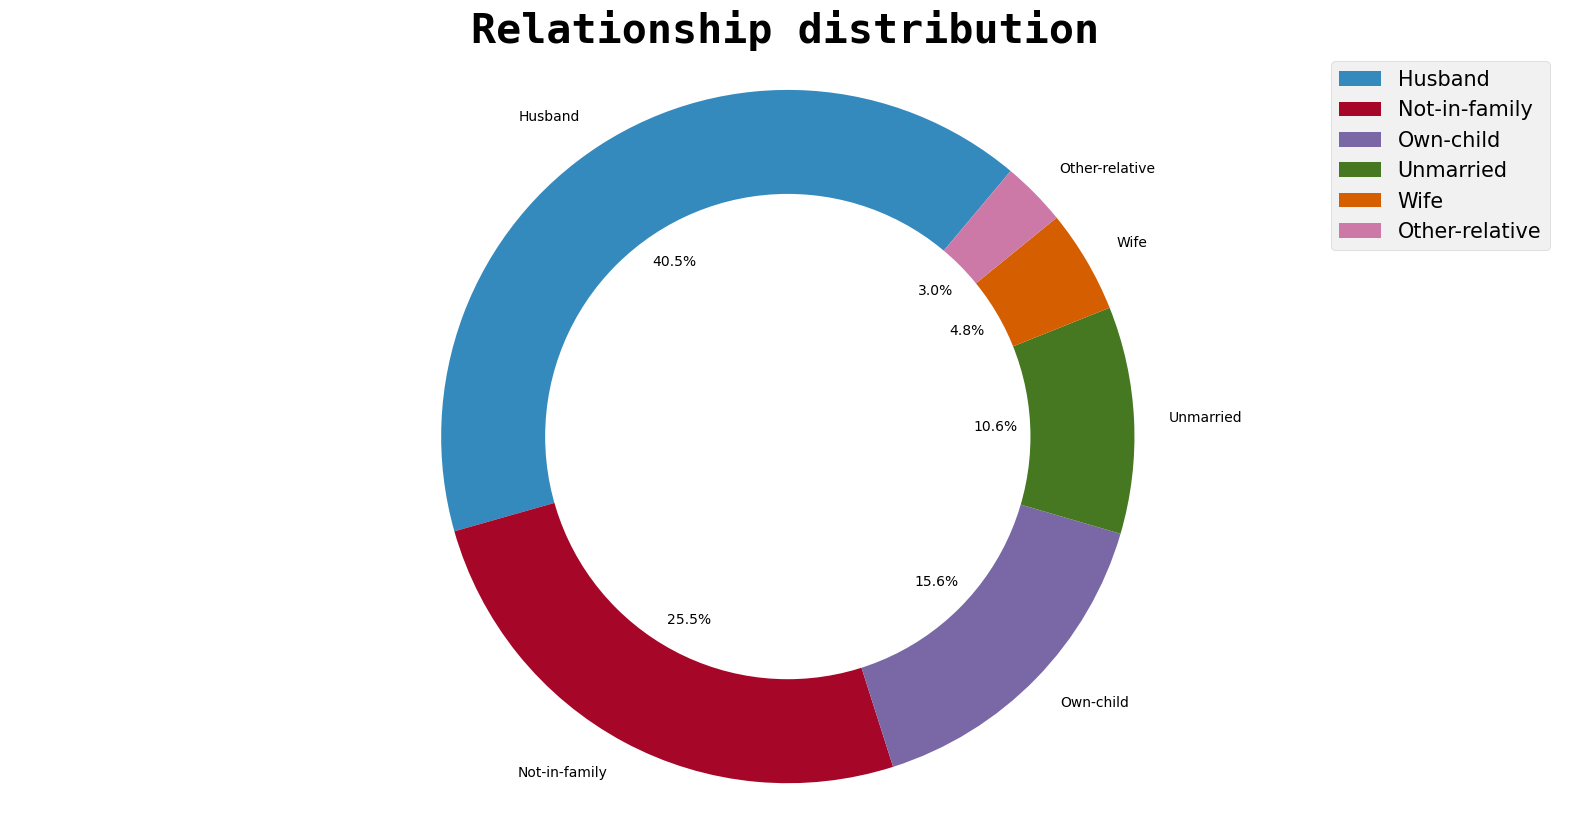

In [204]:
# Creating a donut chart for 'Age'
relation = df['Relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

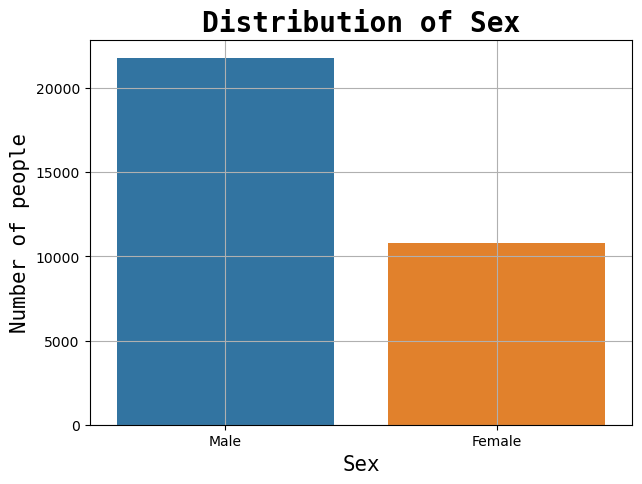

In [205]:
# Creating a barplot for 'Sex'
sex = df['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

In [206]:
!pip3 install squarify

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


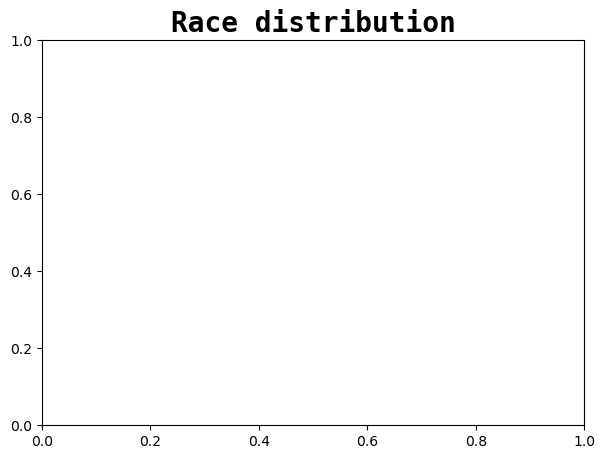

In [207]:
# Creating a Treemap for 'Race'
import matplotlib.pyplot as plt
#import squarify
race = df['Race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
#squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

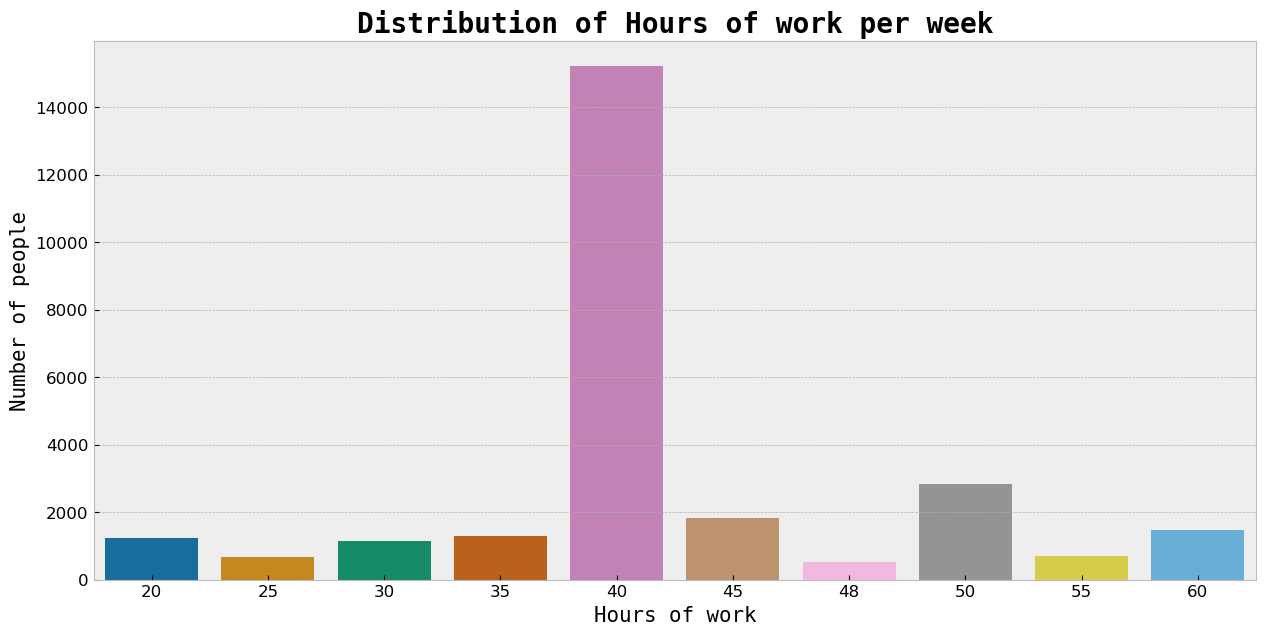

In [208]:
# Creating a barplot for 'Hours per week'
hours = df['Hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

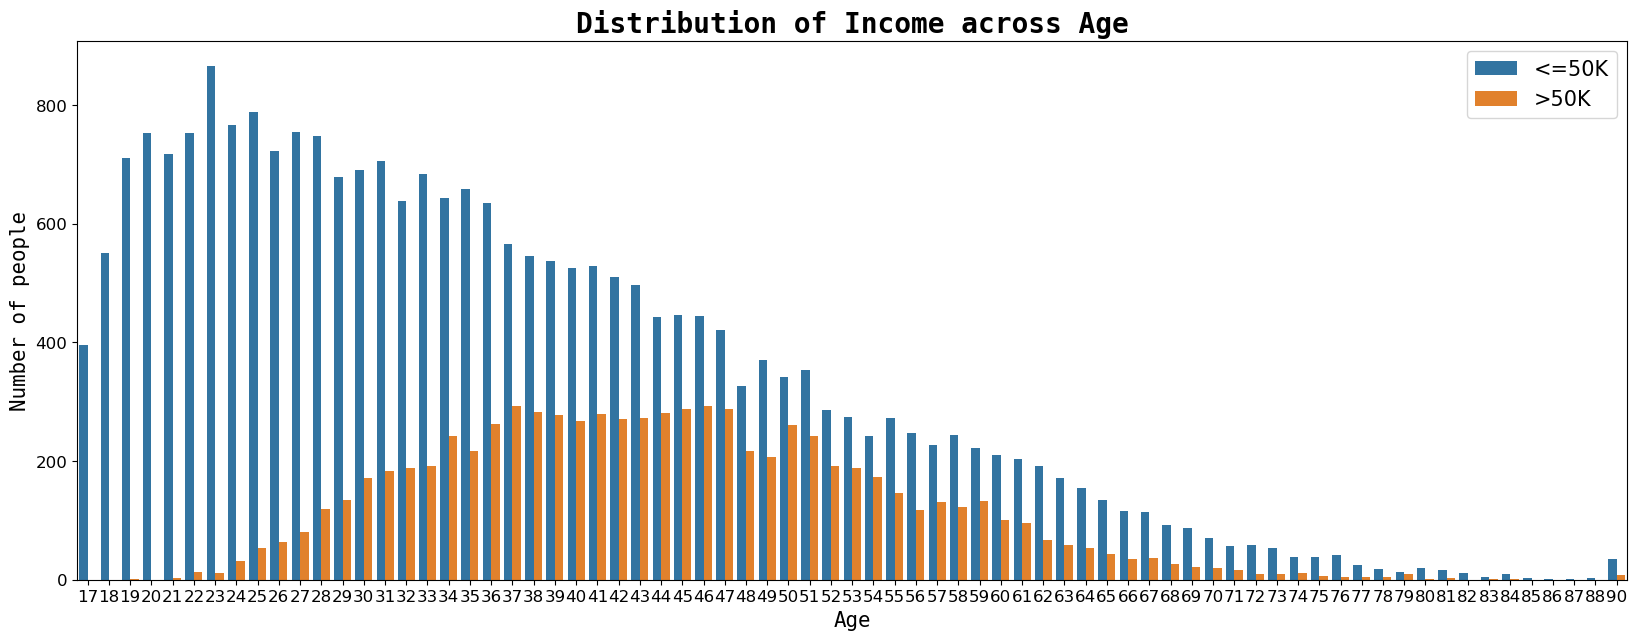

In [209]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(df['Age'], hue=df['Income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

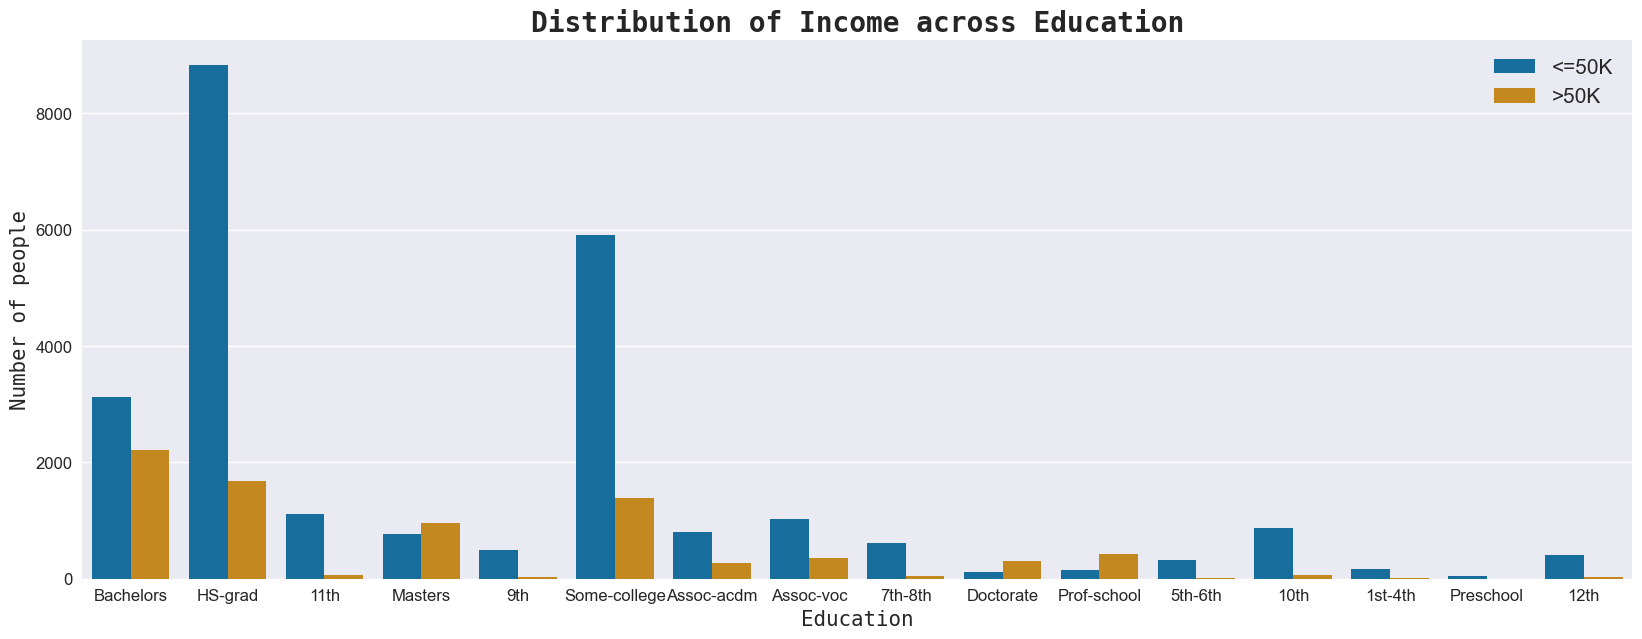

In [210]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['Education'],
              hue=df['Income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

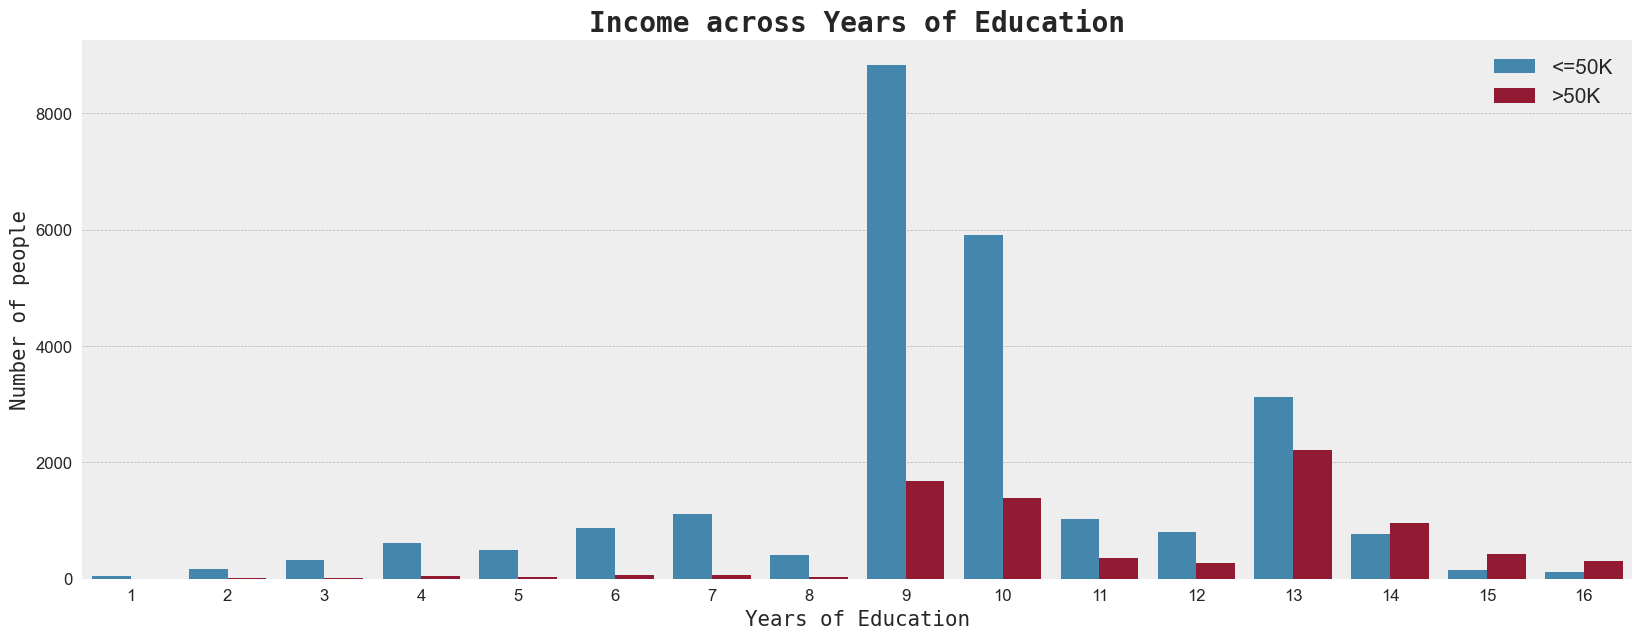

In [211]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(df['Education_num'],
              hue=df['Income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

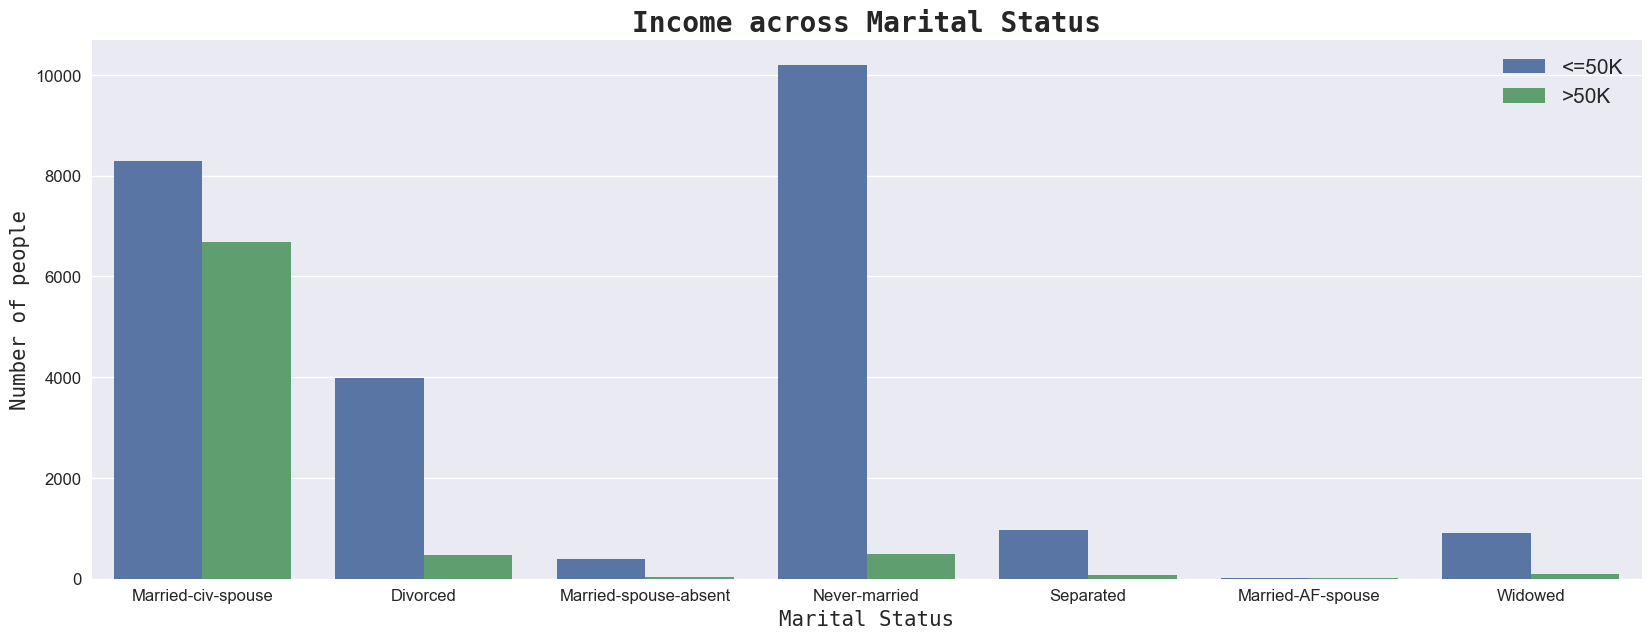

In [212]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['Marital_status'], hue=df['Income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

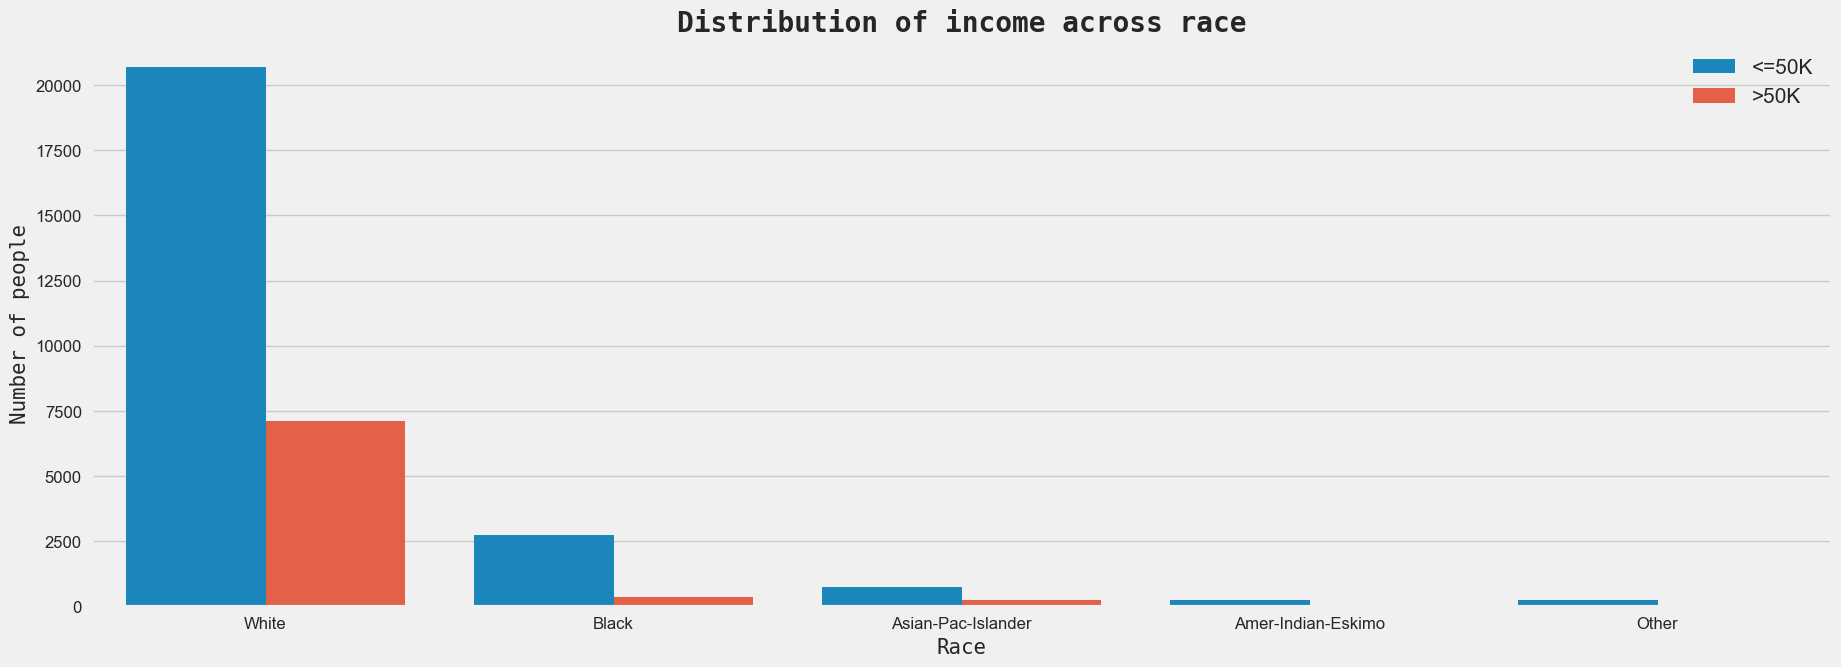

In [213]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(df['Race'], hue=df['Income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

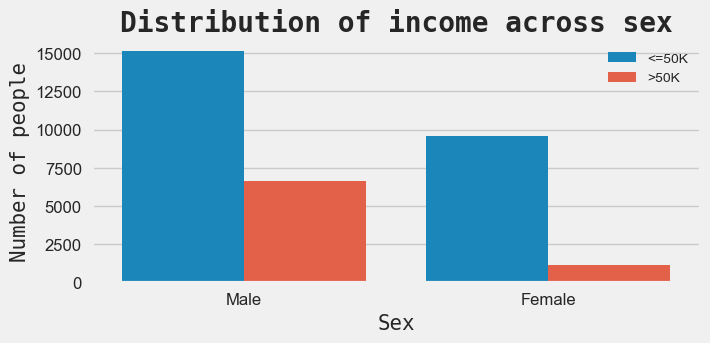

In [214]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(df['Sex'], hue=df['Income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

In [215]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [216]:
df['income'] = le.fit_transform(df['Income'])

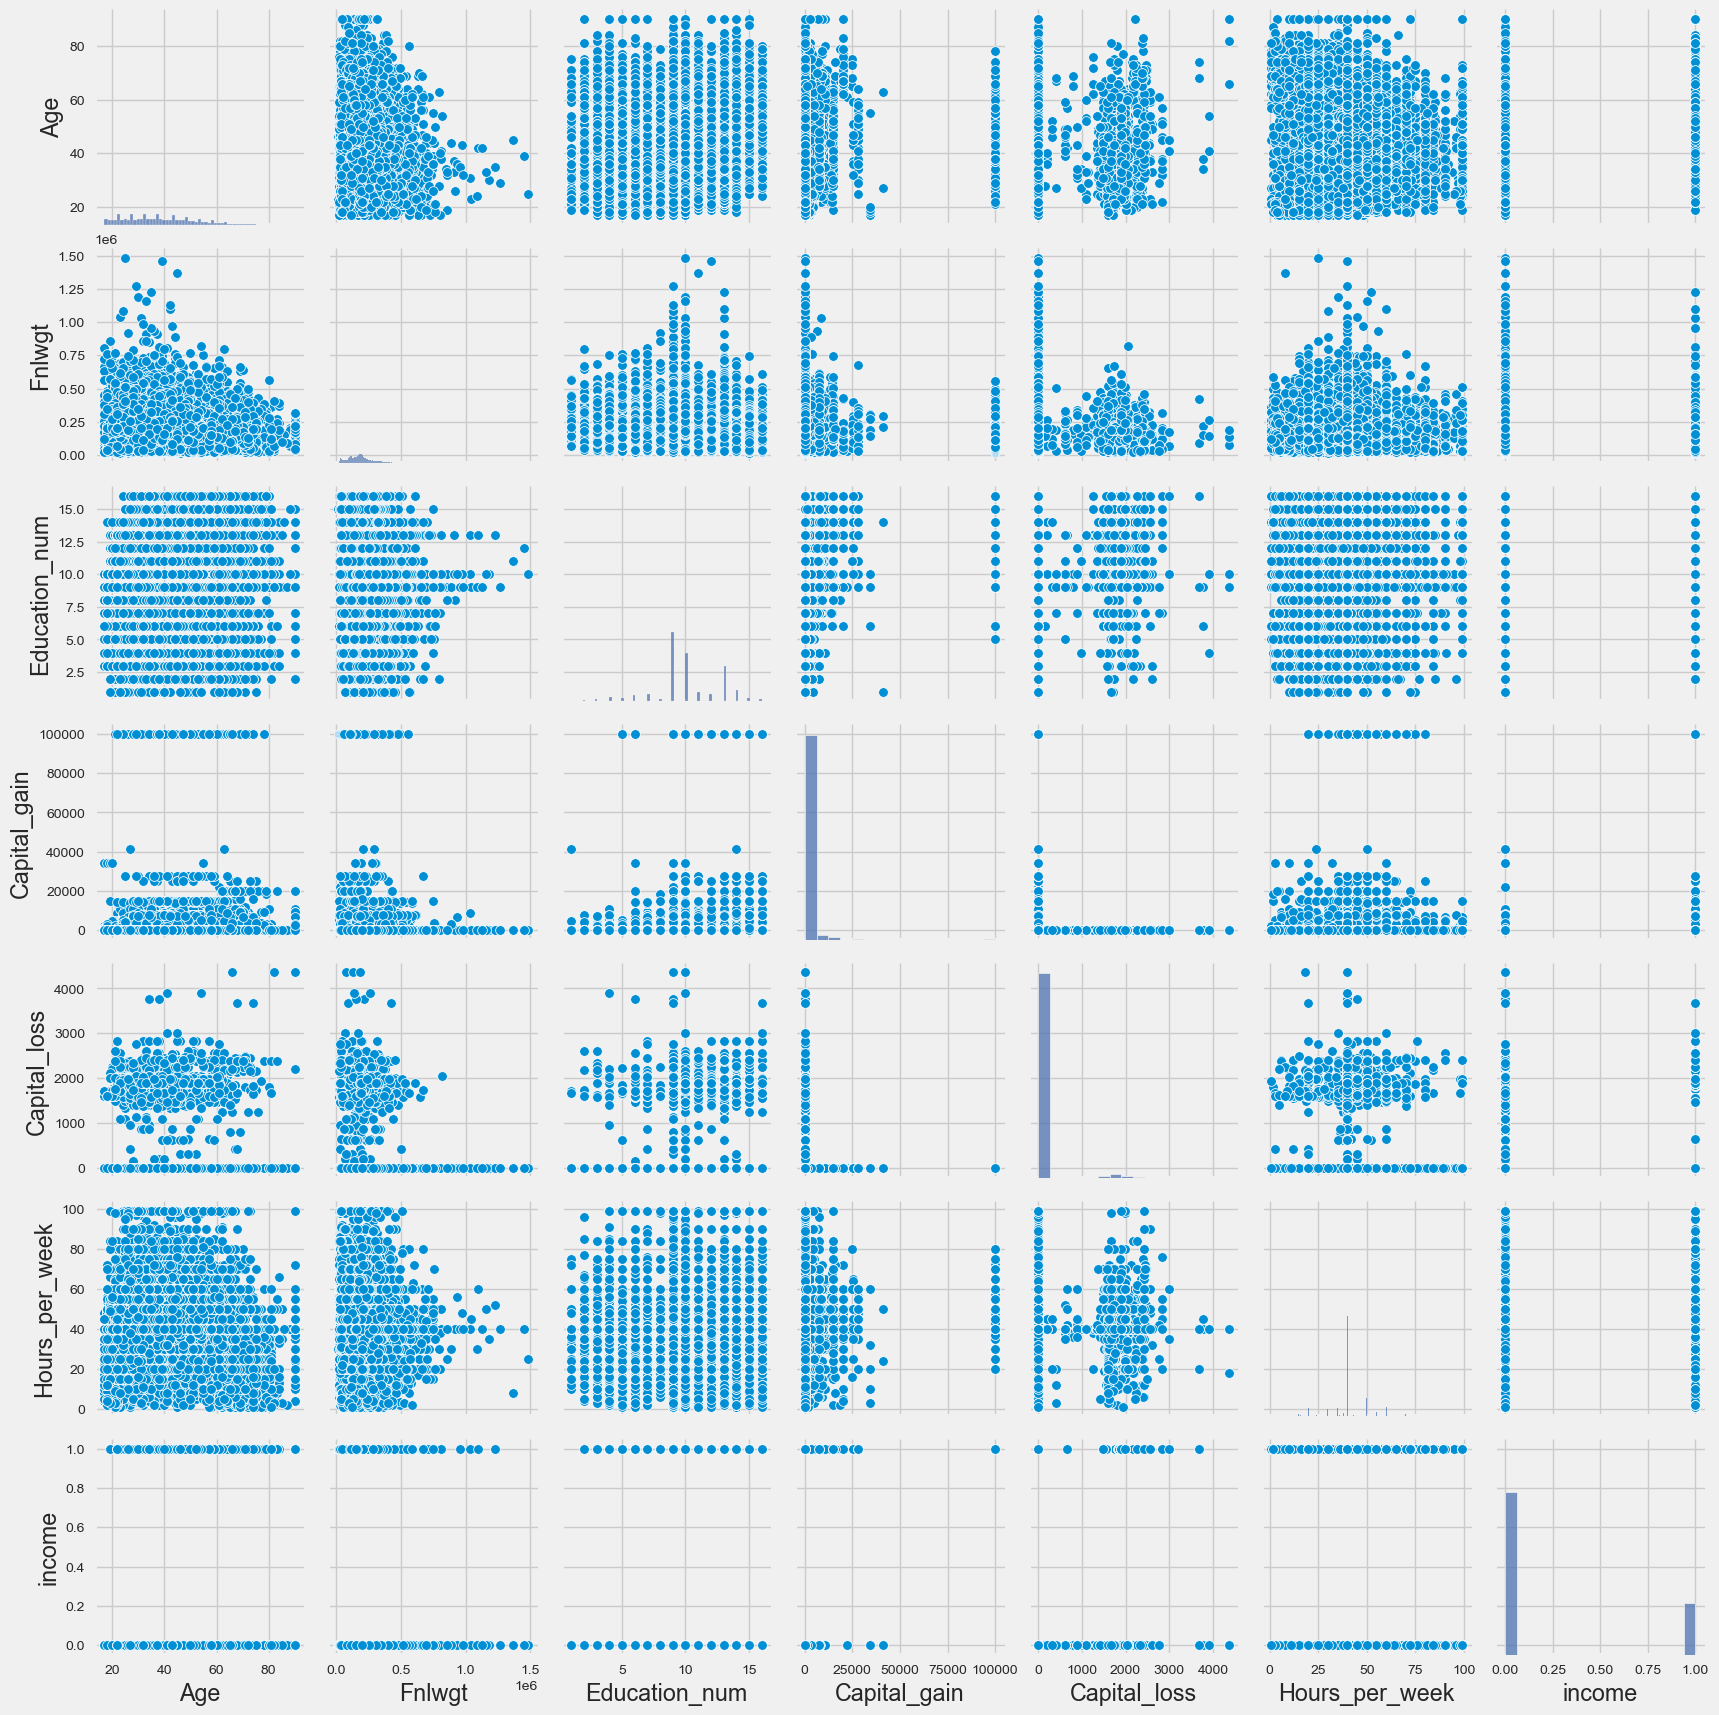

In [217]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

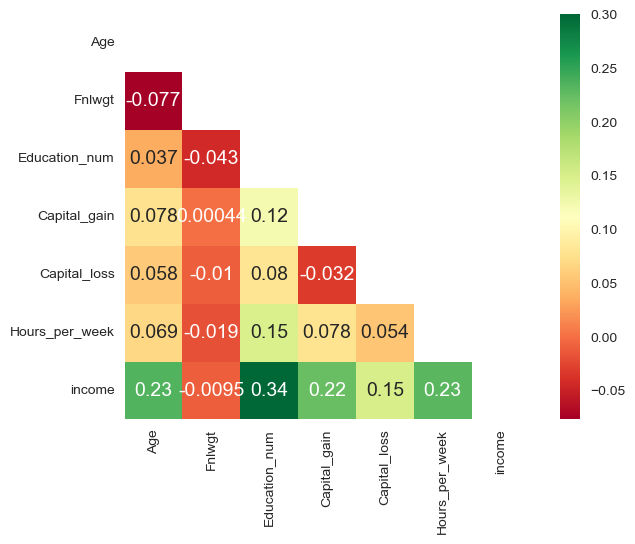

In [218]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

# Data Post Preprocessing

In [219]:
df = df.replace('?', np.nan)

In [220]:
# Checking null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

Age                0.0 %
Workclass         5.64 %
Fnlwgt             0.0 %
Education          0.0 %
Education_num      0.0 %
Marital_status     0.0 %
Occupation        5.66 %
Relationship       0.0 %
Race               0.0 %
Sex                0.0 %
Capital_gain       0.0 %
Capital_loss       0.0 %
Hours_per_week     0.0 %
Native_country    1.79 %
Income             0.0 %
income             0.0 %
dtype: object

In [221]:
columns_with_nan = ['Workclass', 'Occupation', 'Native_country']

In [222]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding

In [223]:
from sklearn.preprocessing import LabelEncoder

In [224]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

# Feature Selection

In [225]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [226]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [227]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [228]:
feature_imp = selector.feature_importances_

In [229]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 1.1
1 0.1
2 0.08
3 0.49
4 2.06
5 2.22
6 0.28
7 3.28
8 0.09
9 1.32
10 1.47
11 0.5
12 0.3
13 0.03
14 86.67


In [230]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int64
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int64
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int64
 6   Occupation      32560 non-null  int64
 7   Relationship    32560 non-null  int64
 8   Race            32560 non-null  int64
 9   Sex             32560 non-null  int64
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int64
 14  income          32560 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [231]:
X = X.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1)

# Feature Scaling

In [232]:
from sklearn.preprocessing import StandardScaler

In [233]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

# Fixing imbalanced dataset using Oversampling

In [234]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: Income, dtype: object

In [235]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [236]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [237]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [238]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: Income, dtype: object

# Creating a train test split

In [354]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [355]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39550, 9)
X_test shape: (9888, 9)
Y_train shape: (39550,)
Y_test shape: (9888,)


# Data Modelling

In [357]:
X_train

,Age,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Capital_gain,Hours_per_week,income
41431,1.496900,-0.000576,1.134779,-0.406183,-0.286703,-0.900177,-0.145914,-0.035430,1.775537
16109,-1.508870,0.033238,-0.031325,0.921660,0.216751,0.966924,-0.145914,-1.655200,-0.563210
40443,0.250605,-0.123790,1.523480,0.921660,-0.790156,-0.277810,-0.145914,-0.035430,1.775537
26927,2.083392,-0.546905,-0.420027,-0.406183,0.720204,-0.900177,-0.145914,-1.655200,-0.563210
43966,1.057031,1.085487,-0.031325,-0.406183,-1.041883,-0.900177,-0.145914,-0.359384,1.775537
...,...,...,...,...,...,...,...,...,...
11284,0.470540,0.376456,-0.420027,0.257739,-1.041883,-0.277810,-0.145914,2.556203,-0.563210
44732,0.470540,0.235392,2.300883,2.249503,0.720204,1.589291,1.887859,-0.035430,1.775537
38158,-0.115952,1.630594,1.134779,0.921660,0.720204,-0.277810,1.278540,-0.035430,1.775537
860,0.323917,0.016724,-0.420027,-0.406183,-0.538429,-0.900177,-0.145914,-0.035430,-0.563210


# Logistic Regression

In [358]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [359]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [360]:
LogisticRegression(random_state=42)

LogisticRegression(random_state=42)

In [361]:
Y_pred_log_reg = log_reg.predict(X_test)

# KNN Classifier

In [362]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [363]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [364]:
Y_pred_knn = knn.predict(X_test)

# Support Vector Classifier

In [365]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [366]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [367]:
Y_pred_svc = svc.predict(X_test)

# Naive Bayes Classifier

In [368]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [369]:
nb.fit(X_train, Y_train)

GaussianNB()

In [370]:
Y_pred_nb = nb.predict(X_test)

# Decision Tree Classifier

In [371]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [372]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [373]:
Y_pred_dec_tree = dec_tree.predict(X_test)

# Random Forest Classifier

In [374]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [375]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [376]:
Y_pred_ran_for = ran_for.predict(X_test)

# Model Evaluation

In [377]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [378]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 100.0
F1 score: 100.0


In [379]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 100.0
F1 score: 100.0


In [380]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 100.0
F1 score: 100.0


In [381]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 100.0
F1 score: 100.0


In [382]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 100.0
F1 score: 100.0


In [383]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 100.0
F1 score: 100.0


In [384]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 100.0
F1 score: 100.0


# Step 6: Hyperparameter Tuning

In [386]:
from sklearn.model_selection import RandomizedSearchCV

In [387]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [388]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [389]:
rf_tuned = RandomForestClassifier(random_state=42)

In [390]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [391]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [392]:
rf_cv.best_score_

1.0

In [393]:
rf_cv.best_params_

{'n_estimators': 110, 'max_depth': 40}

In [394]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [395]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [396]:
Y_pred_rf_best = rf_best.predict(X_test)

In [397]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 100.0
F1 score: 100.0


In [398]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

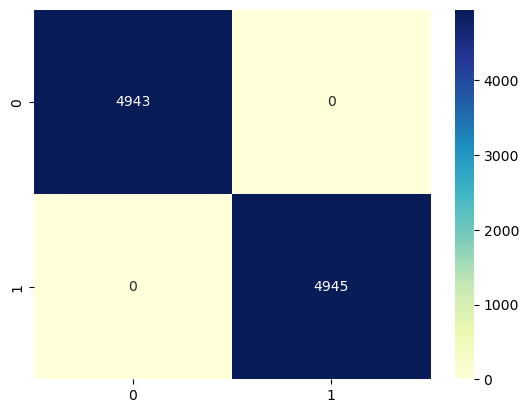

In [399]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [400]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4943
           1       1.00      1.00      1.00      4945

    accuracy                           1.00      9888
   macro avg       1.00      1.00      1.00      9888
weighted avg       1.00      1.00      1.00      9888



# Cross Validation of the Score

In [402]:
Y_pred_rf_best=log_reg.predict(X_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(Y_test,Y_pred_rf_best)
for j in range(2,10):
    lsscore=cross_val_score(log_reg,X_test,Y_test,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross Validation Score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")
    

At cv:- 2
Cross Validation Score is:- 100.0
accuracy_score is:- 100.0


At cv:- 3
Cross Validation Score is:- 100.0
accuracy_score is:- 100.0


At cv:- 4
Cross Validation Score is:- 100.0
accuracy_score is:- 100.0


At cv:- 5
Cross Validation Score is:- 100.0
accuracy_score is:- 100.0


At cv:- 6
Cross Validation Score is:- 100.0
accuracy_score is:- 100.0


At cv:- 7
Cross Validation Score is:- 100.0
accuracy_score is:- 100.0


At cv:- 8
Cross Validation Score is:- 100.0
accuracy_score is:- 100.0


At cv:- 9
Cross Validation Score is:- 100.0
accuracy_score is:- 100.0




# Model Saving

In [403]:
import pickle
filename= 'Census Income.pkl'
pickle.dump(Y_pred_rf_best,open (filename,'wb'))